# Basis Expansions and Regularization

## Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import math
from ipywidgets import interact, interact_manual

## Piecewise Polynomials and Splines 

### Example Figure 5.2 and Equotian 5.3

In [42]:
## lets generate an imputvariable stored in x
x = np.arange(0,10,0.1)
y = np.sin(x) 
yNoise = y + np.random.normal(0,0.2,len(x))

In [43]:
## define function for cubic second order continious spline

def cubicSpline(X,ne1,ne2):
    """compute cubic spline for input X
    and nodes ne
    
    Parameters
    ----------
    X : ndarray(1,N)  
        Input X
    ne1 : int
        index of node 1 in X
    ne2 : int
        index of node 2 in X      
        
    Return
    -------
    basis : ndarray(M,len(X))
        matrix that contains the basis expansions for Input X with M basis functions
    """
    e1 = X[ne1]
    e2 = X[ne2]
    # create basis functions
    M = 6 # number of bases
    basis = np.zeros((M,len(X)))
    basis[0,:] = np.ones(len(X))
    basis[1,:] = X
    basis[2,:] = X**2
    basis[3,:] = X**3
    basis[4,ne1:] = (X[ne1:]-e1)**3
    basis[5,ne2:] = (X[ne2:]-e2)**3
    
    return basis  

def getB(model,y):
    """compute coefficents b for model via least squares
    
    Parameters
    ----------
    model : ndarray(M,len(x))
        basis expansions
    y : ndarray(1,len(x))
        f(x)      
    Return
    -------
    b : ndarray(M,1)
        coefficients
    """
    b = np.dot(np.dot(np.linalg.inv(np.dot(model,model.T)),model),y)
    return b 

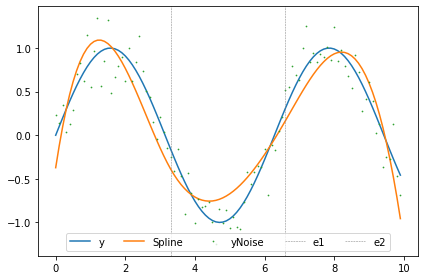

In [44]:
## recreate spline from example (cubic and continous)
# Page 143, Figure 5.3

# calculate splines
# nodes 
ne1 = 33 # number in time array
ne2 = 66

H = cubicSpline(x,ne1,ne2)
b = getB(H,yNoise)

# f(x) = b.T * h
spline = b.reshape(len(b),1) *  H
spline = sum(spline,0)

# plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(x,y)
ax1.plot(x,spline)
ax1.plot(x,yNoise,'o',markersize = 0.7)
ax1.axvline(x[ne1],ls = '--', lw = .5, color = 'C7')
ax1.axvline(x[ne2],ls = '--', lw = .5, color = 'C7')
ax1.legend(['y','Spline','yNoise','e1','e2'], loc = 'lower center', ncol = 6)
plt.tight_layout()
plt.show()



In [46]:
## interactive part - get a feeling for nodes

@interact
def show_articles_more_than(n1=(0, 99, 1), n2=(0, 99, 1)):
    H = cubicSpline(x,n1,n2)
    b = getB(H,yNoise)
    fx = b.reshape(len(b),1) * H
    fx = sum(fx,0)
    
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.plot(x,y)
    ax3.plot(x,fx)
    ax3.plot(x,yNoise,'o',markersize = 0.7)
    ax3.axvline(x[n1],ls = '--', lw = .5, color = 'C7')
    ax3.axvline(x[n2],ls = '--', lw = .5, color = 'C7')
    return 


interactive(children=(IntSlider(value=49, description='n1', max=99), IntSlider(value=49, description='n2', max…

In [67]:
def cubicSpline2(X,k):
    """compute cubic spline for input X
    and nodes ne
    
    Parameters
    ----------
    X : ndarray(1,N)  
        Input X
    k : int
        number of knots 
        
    Return
    -------
    basis : ndarray(M,len(X))
        matrix that contains the basis expansions for Input X with M basis functions
    """
    interval = math.floor(len(X)/(k+1))
    print(interval)
    # create basis functions
    M = 4 + k 
    basis = np.zeros((M,len(X)))
    basis[0,:] = np.ones(len(X))
    basis[1,:] = X
    basis[2,:] = X**2
    basis[3,:] = X**3
    for i in range(1,k+1):
        basis[3+i,interval*i:] = (X[interval*i:]-X[interval*i])**3
    return basis  

def getB(model,y):
    """compute coefficents b for model via least squares
    
    Parameters
    ----------
    model : ndarray(M,len(x))
        basis expansions
    y : ndarray(1,len(x))
        f(x)      
    Return
    -------
    b : ndarray(M,1)
        coefficients
    """
    b = np.dot(np.dot(np.linalg.inv(np.dot(model,model.T)),model),y)
    return b 
                         

In [72]:
## interactive part - get a feeling for nodes

@interact
def show_articles_more_than(n=(0, 20, 1)):
    H = cubicSpline2(x,n)
    b = getB(H,yNoise)
    fx = b.reshape(len(b),1) * H
    fx = sum(fx,0)
    
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.plot(x,y)
    ax3.plot(x,fx)
    ax3.plot(x,yNoise,'o',markersize = 0.7)
    return 


interactive(children=(IntSlider(value=10, description='n', max=20), Output()), _dom_classes=('widget-interact'…

## Natrual Splines

In [38]:
## define functions

def natCubicSpline(X,iKnots):
    """compute natural cubic spline for input X
    and nodes n
    
    Parameters
    ----------
    X : ndarray(1,N)  
        Input X
    iKnots : int
        number of knots    
        
    Return
    -------
    matBasis : ndarray(2+n,len(X))
        matrix that contains the basis expansions for Input X with 2+nbasis functions
    """
    # create basis functions
    K = 2+iKnots # number of bases
    matBasis = np.zeros((K,len(X)))
    matBasis[0,:] = np.ones(len(X))
    matBasis[1,:] = X
    iN = len(X)
    iInterval = ceil(iN/iKnots) #interval length
    
    basis = np.zeros((iKnots+1,len(X)))
    basis[iKnots,X[iInterval*(iKnot+1)]:] = (X[iInterval(iKnot+1):]-X[iInterval*(iKnot+1)])**3
    
    for k in range(0,iKnots):
        basis[k,X[iInterval*(k+1)]:] = (X[iInterval*(k+1):]-X[iInterval**(k+1)])**3
        d_k = (basis[k,:] - basis[iKnots,:]/(X[iInterval*K]-X[iInterval*(k+1)])
        d_K1 = ((X[iInterval*(K-1):]-X[iInterval*(K-1)])**3 - (X[iInterval*K:]-X[iInterval*K])**3)/(X[iInterval*K]-X[iInterval*(K-1)])
        matBasis[k+2,:] =  d_k - d_k1
        print(k)
    return matBasis
    

In [39]:
matNatSpline = natCubicSpline(x,2)

TypeError: slice indices must be integers or None or have an __index__ method